# Zadanie nr 6

In [1]:
from math import factorial, sqrt, pi, e
from matplotlib import pyplot as plt
from functools import lru_cache
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi'] = 300

### Zadanie 1

In [2]:
def liczby_catalana(n=1):
    """Generuje liczby Catalana za pomocą wzoru rekurencyjnego
    
    Argumenty:
        n - liczba liczb do wygenerowania (domyślnie 1)
        
    Zwraca:
        Tablicę zawierającą liczby Catalana
    """
    @lru_cache
    def generator(N):
        if N == 0:
            return 1
        suma = 0
        for i in range(int(N)):
            suma += generator(i) * generator(N - 1 - i)
        return suma

    return np.array([generator(i) for i in range(n)])

In [3]:
def liczby_catalana_fact(iterable):
    """Generuje liczby Catalana za pomocą wzoru na wyraz ogólny ciągu
    
    Argumenty:
        iterable - obiekt iterowalny produkujący sekwencję liczb,
                   dla których mają zostać obliczone liczby Catalana
    
    Zwraca:
        Tablicę zawierającą liczby Catalana
    """
    def generator(N):
        return factorial(2 * N) / (factorial(N + 1) * factorial(N))

    return np.array([generator(i) for i in iterable])

In [4]:
def liczby_catalana_asymp(iterable):
    """Generuje przybliżenia liczb Catalana,
    korzystając z zależności asymptotycznej
    
    Argumenty:
        iterable - obiekt iterowalny produkujący sekwencję liczb,
                   dla których mają zostać obliczone
                   przybliżenia liczby Catalana
    
    Zwraca:
        Tablicę zawierającą przybliżenia liczb Catalana
    """
    def generator(N):
        if N == 0:
            return 1
        return 4 ** N / (N ** (3 / 2) * sqrt(pi))

    return np.array([generator(i) for i in iterable])

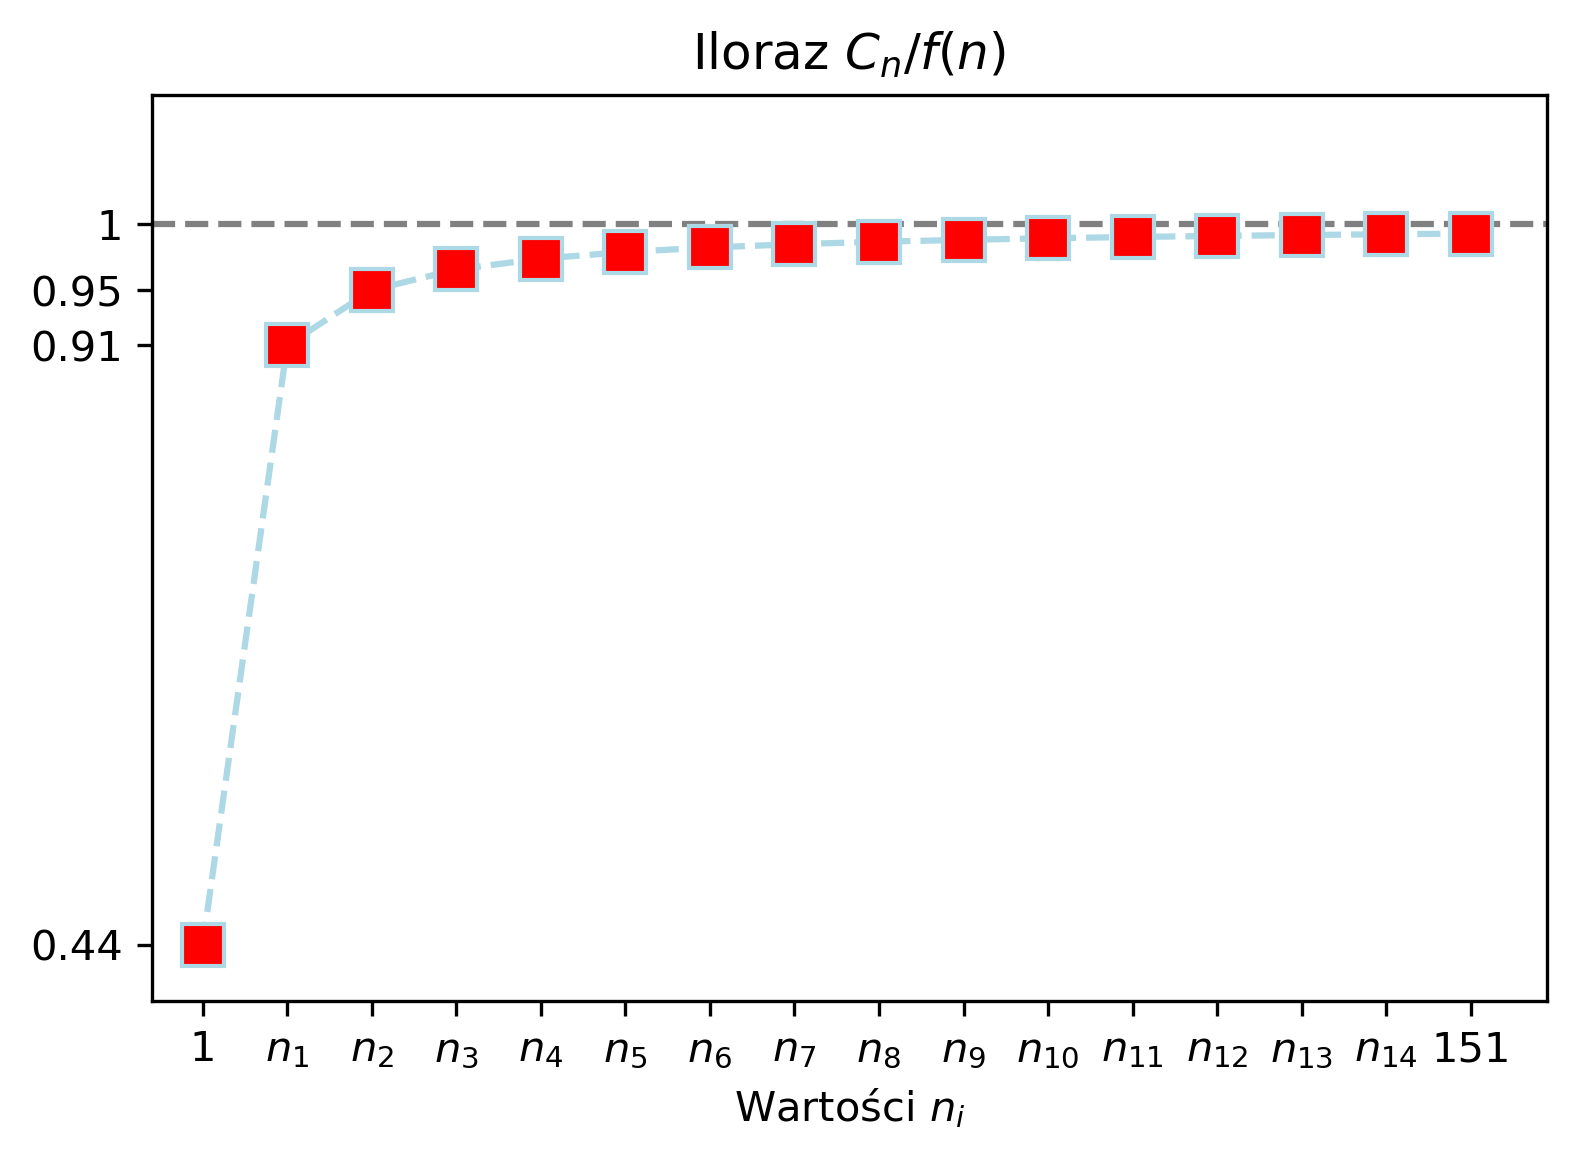

In [5]:
y = liczby_catalana_fact(range(1, 152, 10))
y /= liczby_catalana_asymp(range(1, 152, 10))

plt.axhline(1, linestyle='--', color='grey')
plt.plot(np.arange(1, 152, 10), y, marker='s', markerfacecolor='red',
         markeredgecolor='lightblue', markersize=10,
         color='lightblue', linestyle='--')

plt.xlim(-5, 160)
plt.ylim(0.4, 1.1)

plt.xticks(range(1, 152, 10),
           [(('$n_{' + str(int(i / 10)) + '}$')
            if (1 < i < 151) else str(i))
            for i in range(1, 152, 10)])
ticks = [y[0]]
for i in range(1, len(y)):
    if y[i]-y[i-1]>0.04:
        ticks.append(y[i])
plt.yticks(ticks + [1], [f'{i:.2f}' for i in ticks] + [str(1)])

plt.xlabel('Wartości $n_i$')

plt.title('Iloraz $C_n/f(n)$')
plt.show()

### Zadanie 2

In [6]:
def get_stirling(n):
    """Zwraca przybliżenie silni liczby n
    korzystając ze wzoru stirlinga"""
    return sqrt(2 * pi * n) * (n / e) ** n

In [7]:
def get_ramanujan(n):
    """Zwraca przybliżenie silni liczby n
    korzystając ze wzoru ramanujana"""
    return sqrt(pi) * (n/e)**n * (8*n*n*n + 4*n*n + n + 1/30)**(1/6)

In [8]:
def get_burnside(n):
    """Zwraca przybliżenie silni liczby n
    korzystając ze wzoru burnside'a"""
    return sqrt(2 * pi) * ((n + 0.5) / e) ** (n + 0.5)

In [9]:
min_value, max_value = 2, 150
silnia = np.array([factorial(i) for i in range(min_value, max_value)])
stirling = np.array([get_stirling(i) for i in range(min_value, max_value)])
ramanujan = np.array([get_ramanujan(i) for i in range(min_value, max_value)])
burnside = np.array([get_burnside(i) for i in range(min_value, max_value)])

In [10]:
def scatter(method, color):
    plt.scatter(range(min_value, max_value), silnia / method, color=color, s=10)

In [11]:
def find(method):
    return min(np.where(abs(silnia / method - 1) <= 0.0006)[0]) + min_value

In [12]:
ns = find(stirling)
nr = find(ramanujan)
nb = find(burnside)

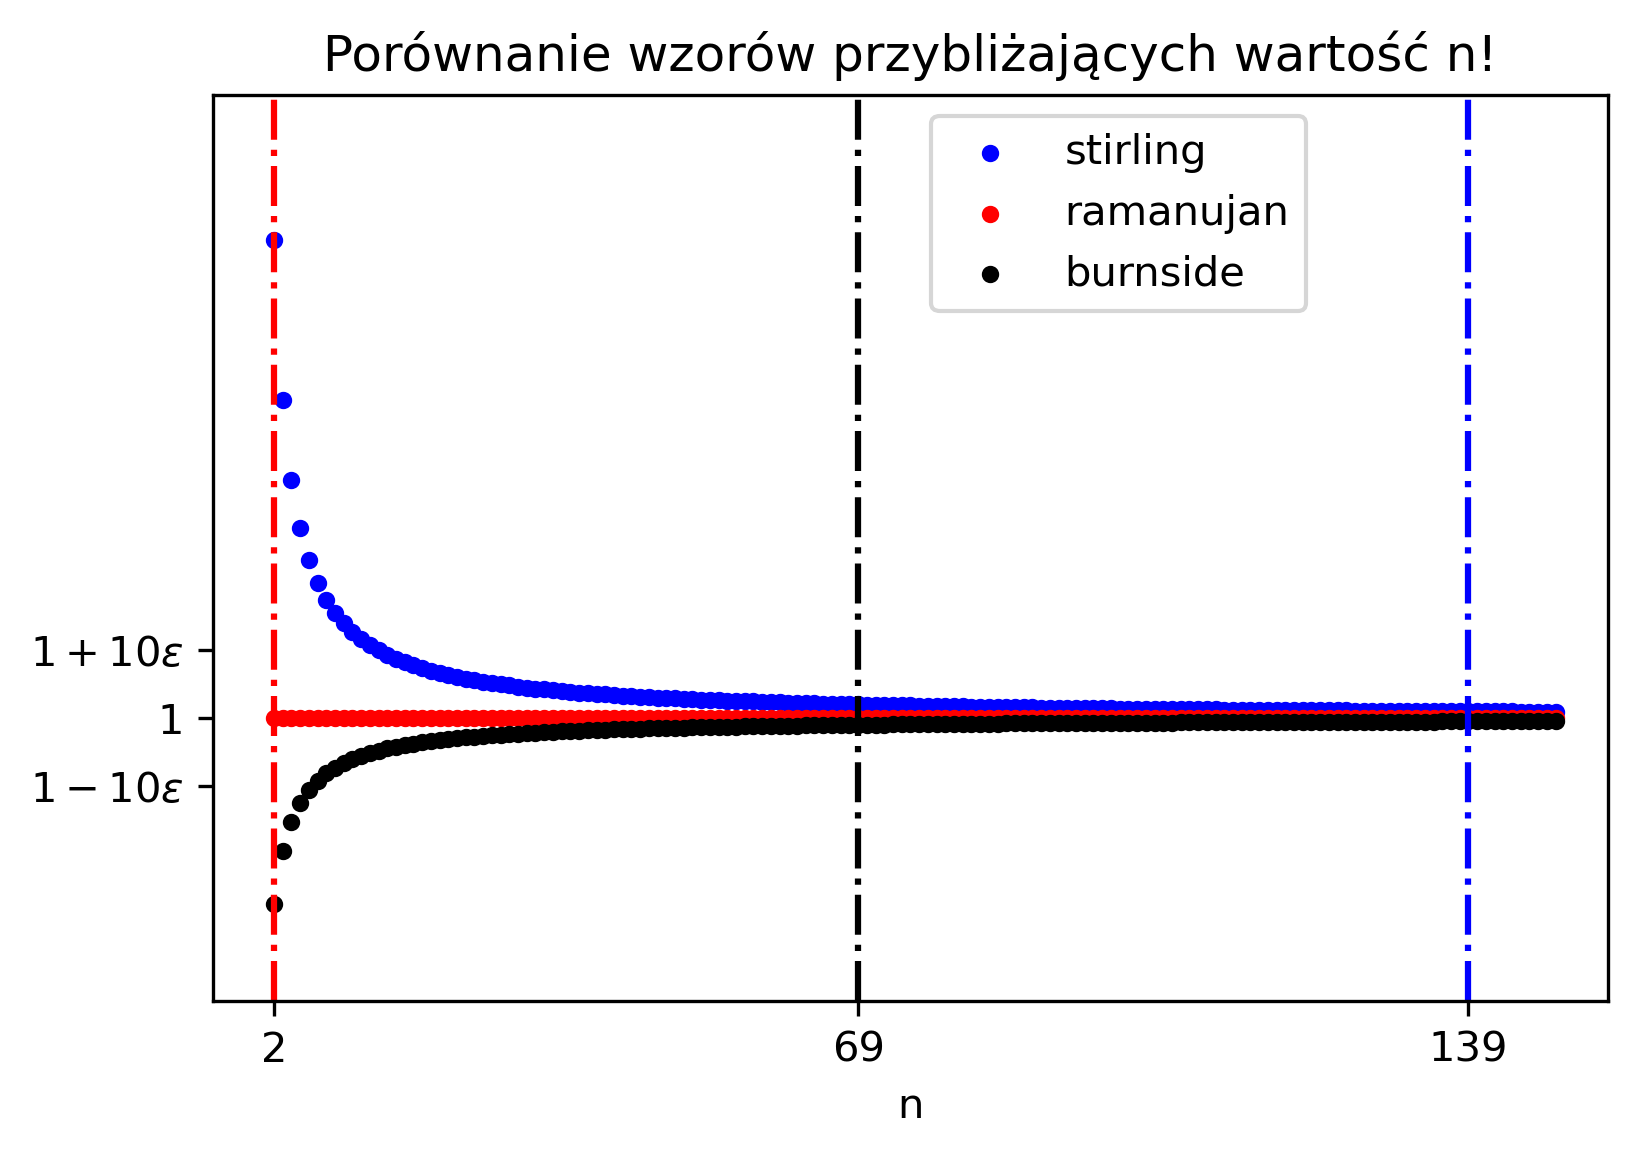

In [13]:
scatter(stirling, 'blue')
scatter(ramanujan, 'red')
scatter(burnside, 'black')

plt.legend(['stirling', 'ramanujan', 'burnside'],
           loc='best', bbox_to_anchor=(0.5, 0.5, 0., 0.5))

plt.axvline(ns, linestyle='-.', color='blue')
plt.axvline(nr, linestyle='-.', color='red')
plt.axvline(nb, linestyle='-.', color='black')

plt.xlim(-5, 155)
plt.ylim(0.975, 1.055)
plt.xticks((ns, nr, nb))
plt.yticks((0.994, 1, 1.006), ('$1-10\epsilon$', '1', '$1+10\epsilon$'))

plt.xlabel('n')
plt.title('Porównanie wzorów przybliżających wartość n!')
plt.show()